# Preceding vehicle velocity estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

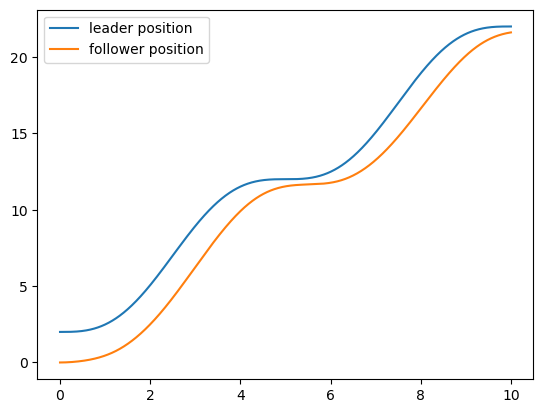

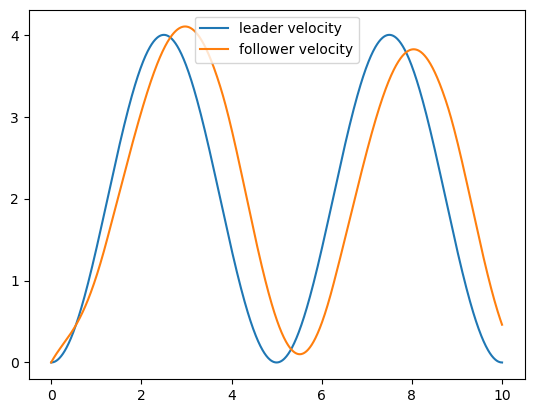

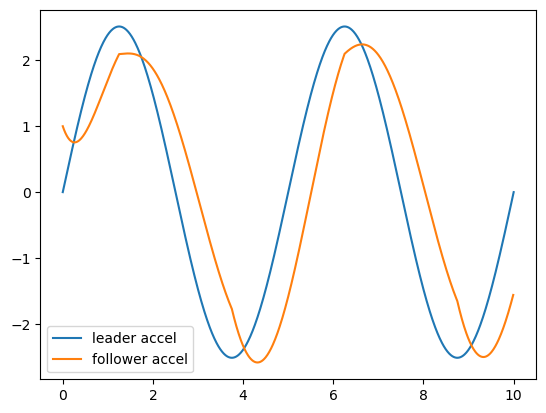

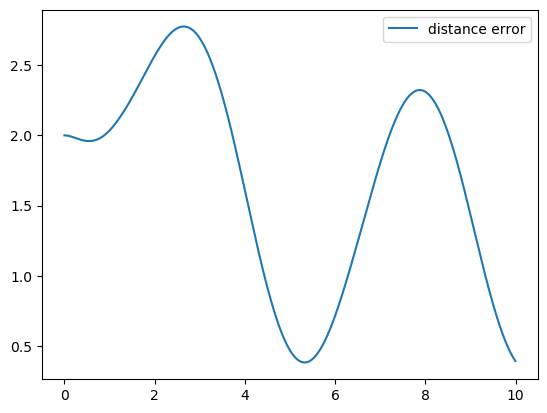

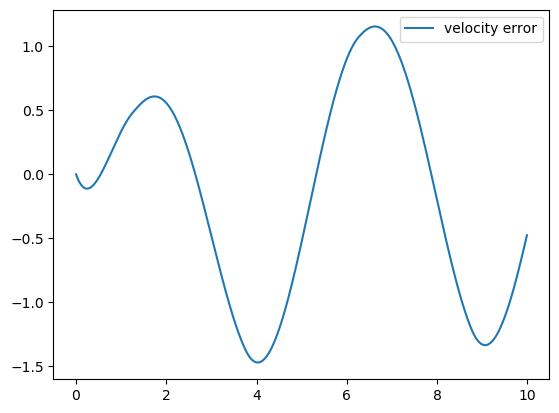

In [2]:
t_total = 10.0
t_N = 1001
dt = t_total / (t_N - 1)
t_space = np.linspace(0, t_total, t_N)

k_p = 1.
k_v = 2.
min_d_des = 1.
tau = .5

x_l_0 = 2.0

x_l = -5 / np.pi * np.sin(np.pi/2.5 * t_space) + 2*t_space + x_l_0
v_l = -2 * np.cos(np.pi / 2.5 * t_space) + 2
a_l = 2 * np.pi / 2.5 * np.sin(np.pi / 2.5 * t_space)

x_f = [0.0]
v_f = [0.0]
a_f = []
e = []
e_dot = []

for i in range(t_N - 1):
    e.append(x_l[i] - x_f[i])
    e_dot.append(v_l[i] - v_f[i])
    d_des = np.maximum(v_l[i] * tau, min_d_des)
    u = k_p * (e[i] - d_des) + k_v * e_dot[i]
    a_f.append(u)
    v_f.append(u * dt + v_f[i])
    x_f.append(.5 * u * dt**2 + v_f[i] * dt + x_f[i])

plt.figure(0)
plt.plot(t_space, x_l, label="leader position")
plt.plot(t_space, x_f, label="follower position")
plt.legend()

plt.figure(1)
plt.plot(t_space, v_l, label="leader velocity")
plt.plot(t_space, v_f, label="follower velocity")
plt.legend()

plt.figure(2)
plt.plot(t_space, a_l, label="leader accel")
plt.plot(t_space[:-1], a_f, label="follower accel")
plt.legend()

plt.figure(3)
plt.plot(t_space[:-1], e, label="distance error")
plt.legend()

plt.figure(4)
plt.plot(t_space[:-1], e_dot, label="velocity error")
plt.legend();